<h1><center><u>Citi Bike Location Data October 2016</u></center></h1>

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import xlrd
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)



<h1 align="center"><font color="blue">Initial Import and Cleanup of Data from Citi Bike</h1></font>

In [2]:
df1 = pd.read_csv("https://s3.amazonaws.com/tripdata/201610-citibike-tripdata.zip")
df1.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [3]:
df1.shape # Total rows, columns respectively.

(1573872, 15)

In [4]:
df1.sort_values('Start Time').head() # sort the data frame in ascending order.

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [5]:
df1['Trip Duration'] = df1['Trip Duration'].astype('float')
df1.dtypes

Trip Duration              float64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
dtype: object

<h1 align="center"><font color="blue">Data Grouping and Preliminary Analysis</font></h1>

## Group and describe the top 20 Starting Stations by Trip Count

In [6]:
df2 = df1.groupby('Start Station Name')['Trip Duration'].describe().sort_values('count', ascending=False).head(20)

## Chart showing the mean trip duration for the to 20 locations by total trips

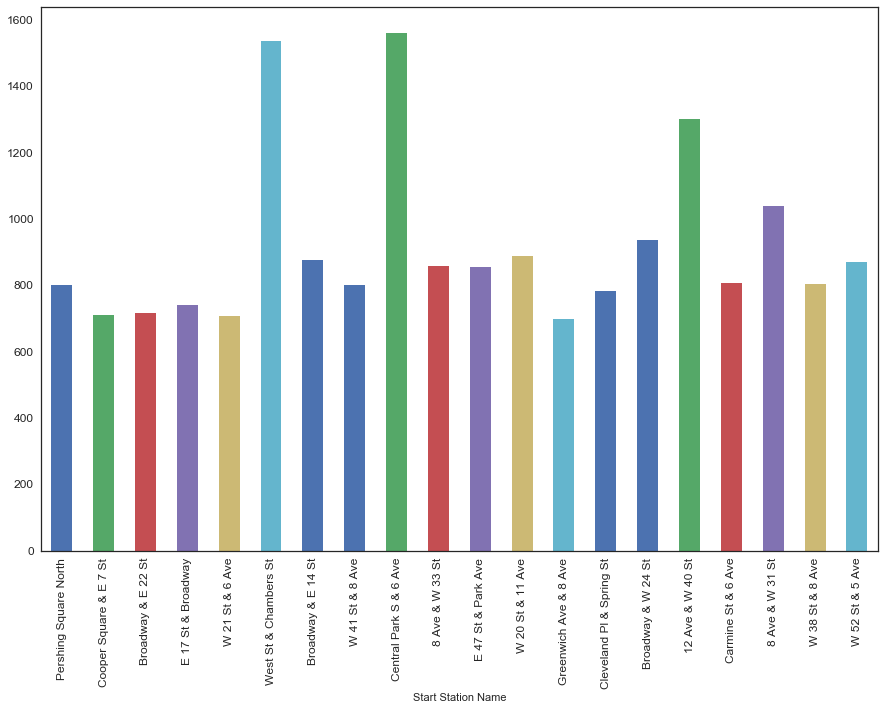

In [7]:
df2['mean'].plot(kind="bar", figsize=(15, 10), fontsize=12)

In [8]:
df1['Start Time'] = pd.to_datetime(df1['Start Time']) # Change 'Start Time' column to datetime

In [9]:
df1.index = df1['Start Time'] # Set the 'Start Time' column to the index.
del df1['Start Time'] # Deletes the 'Start Time' column.

In [10]:
df3 = pd.DataFrame(df1.resample('d').size()) # Top 20 days 

In [11]:
df3 = df3.rename(columns={0: 'Total Trips'})
df3['Day of Week'] = df3.index.dayofweek 
df3.replace({'Day of Week':{0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}})

,Total Trips,Day of Week
Start Time,,
2016-10-01,39811,Sat
2016-10-02,41023,Sun
2016-10-03,56384,Mon
2016-10-04,60379,Tues
2016-10-05,65053,Wed
2016-10-06,67585,Thurs
2016-10-07,65896,Fri
2016-10-08,34625,Sat
2016-10-09,21689,Sun


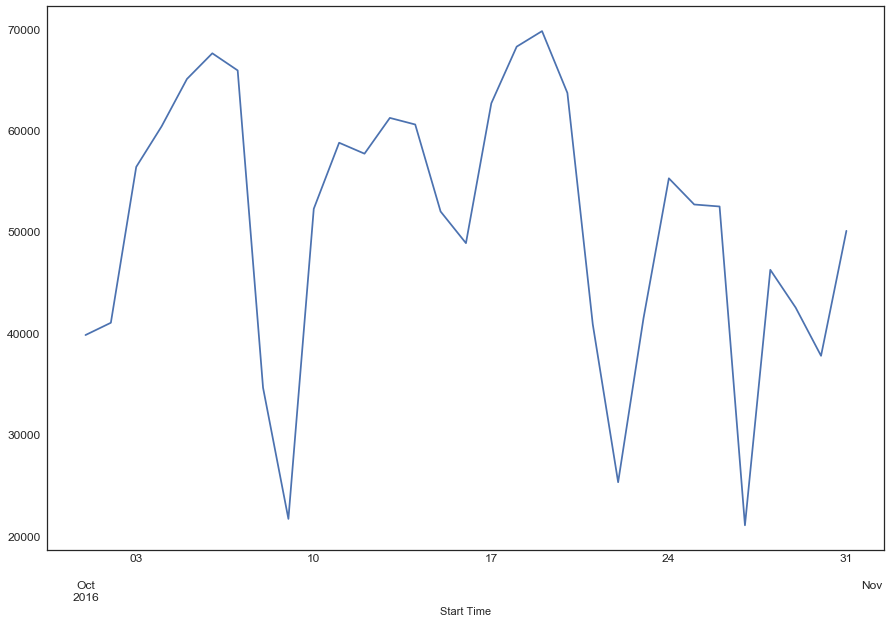

In [12]:
df3['Total Trips'].plot(figsize=(15, 10), fontsize=12)